In [1]:
import pandas as pd 
import scipy.stats as stats
import seaborn as sns
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import os
import glob
from scipy.signal import butter,filtfilt
import scipy

sns.set_theme(style="whitegrid")

C:\Users\Simas\Miniconda3\envs\med4\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
C:\Users\Simas\Miniconda3\envs\med4\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


# Combine single participant's level data

In [2]:
p1 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant1/*.csv')))
p2 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant2/*.csv')))
p3 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant3/*.csv')))
# p4 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant4/*.csv')))
# p5 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant5/*.csv')))
# p6 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant6/*.csv')))
# p7 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant7/*.csv')))
# p8 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant8/*.csv')))
# p9 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant9/*.csv')))
# p10 = pd.concat(map(pd.read_csv, glob.glob('Data/Participant10/*.csv')))

p1

,Valence,Arousal,Expression
0,-0.161933,0.152845,0
1,-0.144700,0.144948,0
2,-0.100124,0.143632,0
3,-0.152162,0.136086,0
4,-0.106743,0.146401,0
...,...,...,...
955,-0.234590,-0.006489,0
956,-0.178168,0.036802,0
957,-0.181725,0.003884,0
958,-0.190511,-0.040157,0


# Extract single level data, taken from all participants

In [3]:
filepath = 'Data/'
fileL1 = 'Level01_images.csv'
fileL2 = 'Level02_images.csv'
fileL3 = 'Level03_images.csv'
fileL4 = 'Level04_images.csv'
fileL5 = 'Level05_images.csv'
fileL6 = 'Level06_images.csv'
fileL7 = 'Level07_images.csv'
fileL8 = 'Level08_images.csv'
fileL9 = 'Level09_images.csv'
fileL10 = 'Level10_images.csv'
fileL11 = 'Level11_images.csv'
fileL12 = 'Level12_images.csv'
fileL13 = 'Level13_images.csv'
fileL14 = 'Level14_images.csv'
fileL15 = 'Level15_images.csv'
fileL16 = 'Level16_images.csv'
fileL17 = 'Level17_images.csv'
fileL18 = 'Level18_images.csv'
fileL19 = 'Level9999_images.csv'

#find folder of each participant
participants = os.listdir('Data/') 
print(participants)

#find a specific level file inside the participant folder
files1 = []
files2 = []
files3 = []
files4 = []
files5 = []
files6 = []
files7 = []
files8 = []
files9 = []
files10 = []
files11 = []
files12 = []
files13 = []
files14 = []
files15 = []
files16 = []
files17 = []
files18 = []
files19 = []
for p in participants:
    files1.append(filepath+p+'/'+fileL1)
    files2.append(filepath+p+'/'+fileL2)
    files3.append(filepath+p+'/'+fileL3)
    files4.append(filepath+p+'/'+fileL4)
    files5.append(filepath+p+'/'+fileL5)
    files6.append(filepath+p+'/'+fileL6)
    files7.append(filepath+p+'/'+fileL7)
    files8.append(filepath+p+'/'+fileL8)
    files9.append(filepath+p+'/'+fileL9)
    files10.append(filepath+p+'/'+fileL10)
    files11.append(filepath+p+'/'+fileL11)
    files12.append(filepath+p+'/'+fileL12)
    files13.append(filepath+p+'/'+fileL13)
    files14.append(filepath+p+'/'+fileL14)
    files15.append(filepath+p+'/'+fileL15)
    files16.append(filepath+p+'/'+fileL16)
    files17.append(filepath+p+'/'+fileL17)
    files18.append(filepath+p+'/'+fileL18)
    files19.append(filepath+p+'/'+fileL19)
print(files2)

#combine different participant's same level data
data1 = []
data2 = []
data3 = []
data4 = []
data5 = []
data6 = []
data7 = []
data8 = []
data9 = []
data10 = []
data11 = []
data12 = []
data13 = []
data14 = []
data15 = []
data16 = []
data17 = []
data18 = []
data19 = []

for f in files1:
    data1.append(pd.read_csv(f))

for f in files2:
    data2.append(pd.read_csv(f))

for f in files3:
    data3.append(pd.read_csv(f))

for f in files4:
    data4.append(pd.read_csv(f))

for f in files5:
    data5.append(pd.read_csv(f))

for f in files6:
    data6.append(pd.read_csv(f))

for f in files7:
    data7.append(pd.read_csv(f))

for f in files8:
    data8.append(pd.read_csv(f))

for f in files9:
    data9.append(pd.read_csv(f))

for f in files10:
    data10.append(pd.read_csv(f))

for f in files11:
    data11.append(pd.read_csv(f))

for f in files12:
    data12.append(pd.read_csv(f))

for f in files13:
    data13.append(pd.read_csv(f))

for f in files14:
    data14.append(pd.read_csv(f))

for f in files15:
    data15.append(pd.read_csv(f))

for f in files16:
    data16.append(pd.read_csv(f))
    
for f in files17:
    data17.append(pd.read_csv(f))

for f in files18:
    data18.append(pd.read_csv(f))

for f in files19:
    data19.append(pd.read_csv(f))


level1 = pd.concat((data1), ignore_index=True)
level2 = pd.concat((data2), ignore_index=True)
level3 = pd.concat((data3), ignore_index=True)
level4 = pd.concat((data4), ignore_index=True)
level5 = pd.concat((data5), ignore_index=True)
level6 = pd.concat((data6), ignore_index=True)
level7 = pd.concat((data7), ignore_index=True)
level8 = pd.concat((data8), ignore_index=True)
level9 = pd.concat((data9), ignore_index=True)
level10 = pd.concat((data10), ignore_index=True)
level11 = pd.concat((data11), ignore_index=True)
level12 = pd.concat((data12), ignore_index=True)
level13 = pd.concat((data13), ignore_index=True)
level14 = pd.concat((data14), ignore_index=True)
level15 = pd.concat((data15), ignore_index=True)
level16 = pd.concat((data16), ignore_index=True)
level17 = pd.concat((data17), ignore_index=True)
level18 = pd.concat((data18), ignore_index=True)
level19 = pd.concat((data19), ignore_index=True)

['Participant1', 'Participant2', 'Participant3']
['Data/Participant1/Level02_images.csv', 'Data/Participant2/Level02_images.csv', 'Data/Participant3/Level02_images.csv']


In [4]:
levels = os.listdir('Data/Participant1/')

levels

['Level01_images.csv',
 'Level02_images.csv',
 'Level03_images.csv',
 'Level04_images.csv',
 'Level05_images.csv',
 'Level06_images.csv',
 'Level07_images.csv',
 'Level08_images.csv',
 'Level09_images.csv',
 'Level10_images.csv',
 'Level11_images.csv',
 'Level12_images.csv',
 'Level13_images.csv',
 'Level14_images.csv',
 'Level15_images.csv',
 'Level16_images.csv',
 'Level17_images.csv',
 'Level18_images.csv',
 'Level9999_images.csv']

# Functions to add labels to graphs

In [5]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with 2 decimal places
        label = "{:.3f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [6]:
def add_value_labels_int(ax, spacing=5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with 2 decimal places
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [7]:
print(level1.iloc[:, 0])

0      -0.161933
1      -0.144700
2      -0.100124
3      -0.152162
4      -0.106743
          ...   
2905   -0.254338
2906   -0.218428
2907   -0.304383
2908   -0.340967
2909   -0.254774
Name: Valence, Length: 2910, dtype: float64


# Plot Arousal + Valence means for each level

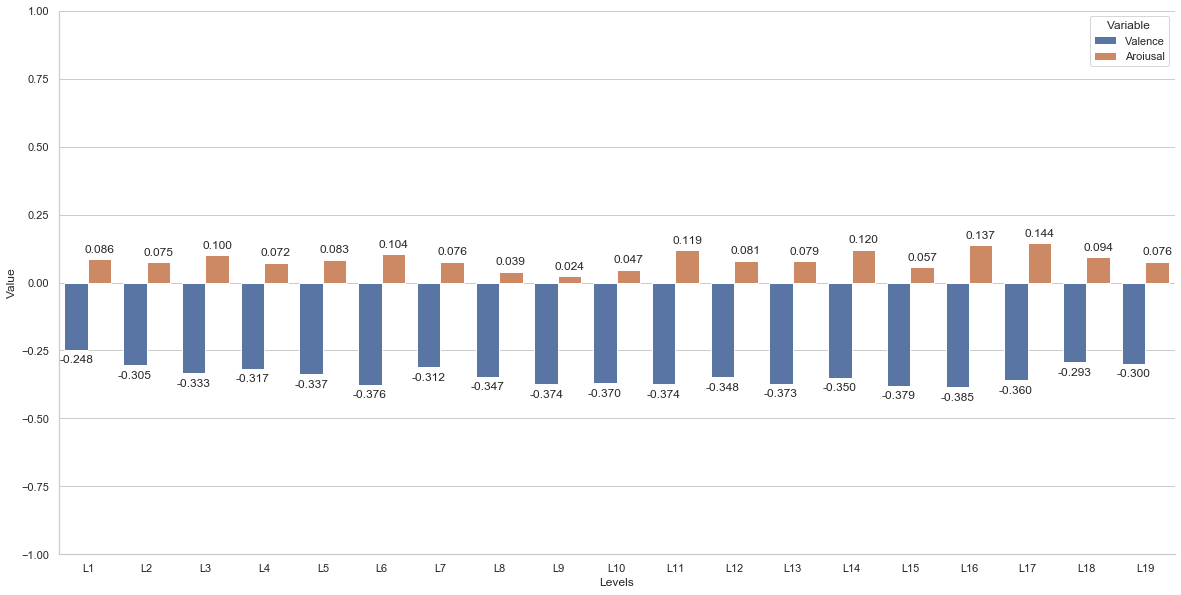

In [8]:
avplot = pd.DataFrame([
        ["L1", level1.iloc[:, 0].mean(), level1.iloc[:, 1].mean()],
        ["L2", level2.iloc[:, 0].mean(), level2.iloc[:, 1].mean()],
        ["L3", level3.iloc[:, 0].mean(), level3.iloc[:, 1].mean()],
        ["L4", level4.iloc[:, 0].mean(), level4.iloc[:, 1].mean()],
        ["L5", level5.iloc[:, 0].mean(), level5.iloc[:, 1].mean()],
        ["L6", level6.iloc[:, 0].mean(), level6.iloc[:, 1].mean()],
        ["L7", level7.iloc[:, 0].mean(), level7.iloc[:, 1].mean()],
        ["L8", level8.iloc[:, 0].mean(), level8.iloc[:, 1].mean()],
        ["L9", level9.iloc[:, 0].mean(), level9.iloc[:, 1].mean()],
        ["L10", level10.iloc[:, 0].mean(), level10.iloc[:, 1].mean()],
        ["L11", level11.iloc[:, 0].mean(), level11.iloc[:, 1].mean()],
        ["L12", level12.iloc[:, 0].mean(), level12.iloc[:, 1].mean()],
        ["L13", level13.iloc[:, 0].mean(), level13.iloc[:, 1].mean()],
        ["L14", level14.iloc[:, 0].mean(), level14.iloc[:, 1].mean()],
        ["L15", level15.iloc[:, 0].mean(), level15.iloc[:, 1].mean()],
        ["L16", level16.iloc[:, 0].mean(), level16.iloc[:, 1].mean()],
        ["L17", level17.iloc[:, 0].mean(), level17.iloc[:, 1].mean()],
        ["L18", level18.iloc[:, 0].mean(), level18.iloc[:, 1].mean()],
        ["L19", level19.iloc[:, 0].mean(), level19.iloc[:, 1].mean()],
        ],  
        columns = ["Levels", "Valence", "Aroiusal"])

fig, ax1 = plt.subplots(figsize=(20, 10))
tidy = avplot.melt(id_vars='Levels').rename(columns=str.title)
sns.barplot(x='Levels', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)
ax1.yaxis.grid(True)
ax1.set_axisbelow(True)
plt.ylim(bottom = -1,top = 1)
add_value_labels(ax1)

# Combine all valence and arousal values for a single participant

In [9]:
av1 = p1.iloc[:, 0:2]
av2 = p2.iloc[:, 0:2]
av3 = p3.iloc[:, 0:2]
# av4 = p4.iloc[:, 0:2]
# av5 = p5.iloc[:, 0:2]
# av6 = p6.iloc[:, 0:2]
# av7 = p7.iloc[:, 0:2]
# av8 = p8.iloc[:, 0:2]
# av9 = p9.iloc[:, 0:2]
# av9 = p10.iloc[:, 0:2]

[(-1, 1)]

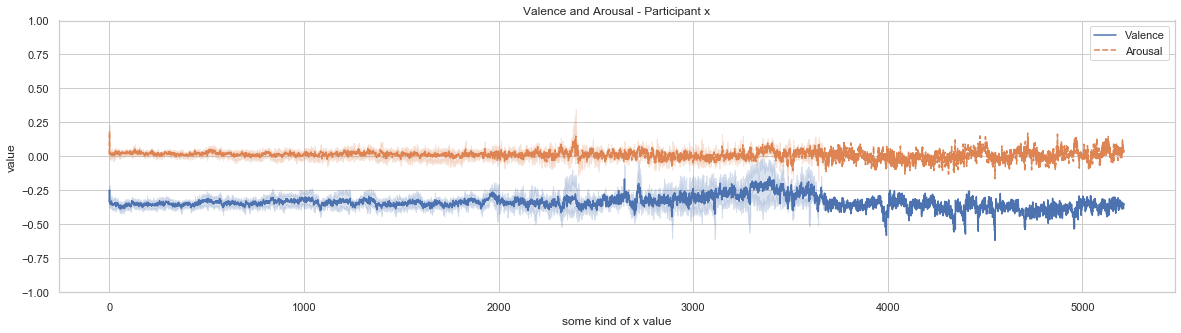

In [19]:
fig, ax = plt.subplots(figsize=(20, 5))

ax = sns.lineplot(data=av2)
ax.set(xlabel='some kind of x value', ylabel='value', title='Valence and Arousal - Participant x')
ax.set(ylim=(-1, 1))

[(-1, 1)]

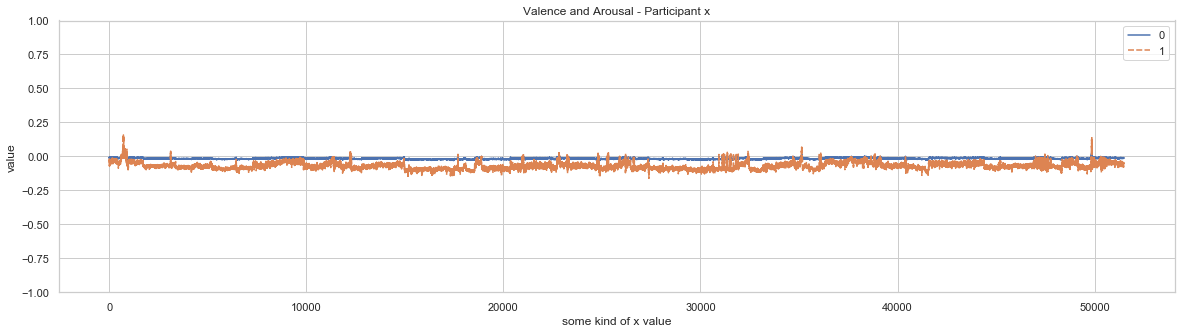

In [11]:
order = 5
sampling_freq = 40
cutoff_freq = 10
sampling_duration = 5
number_of_samples = sampling_freq * sampling_duration
time = np.linspace(0, sampling_duration, number_of_samples, endpoint=False)

normalized_cutoff_freq = 2 * cutoff_freq / sampling_freq
numerator_coeffs, denominator_coeffs = scipy.signal.butter(order, normalized_cutoff_freq)
filtered_signal = scipy.signal.lfilter(numerator_coeffs, denominator_coeffs, av1)

fig, ax = plt.subplots(figsize=(20, 5))

ax = sns.lineplot(data=filtered_signal)
ax.set(xlabel='some kind of x value', ylabel='value', title='Valence and Arousal - Participant x')
ax.set(ylim=(-1, 1))

In [12]:
filtered_signal

array([[-0.00854787, -0.03467122],
       [-0.0076382 , -0.03053967],
       [-0.0052852 , -0.01884419],
       ...,
       [-0.00959263, -0.04775814],
       [-0.01005639, -0.05240173],
       [-0.01098847, -0.05333266]])

In [13]:
avMean = (p1.iloc[:, 0:2]).mean()

avMeanTable = pd.DataFrame([avMean], columns=['Arousal', 'Valence'])
avMeanTable

,Arousal,Valence
0,0.118516,-0.287027


[(-1, 1)]

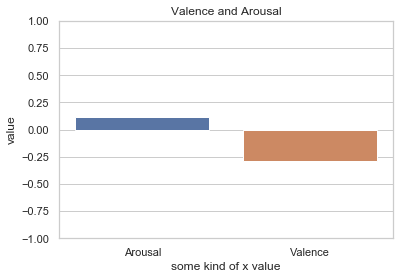

In [14]:
ax = sns.barplot(data=avMeanTable)
ax.set(xlabel='some kind of x value', ylabel='value', title='Valence and Arousal')
ax.set(ylim=(-1, 1))

# Expression Data

In [15]:
#Expression only, extracting data from each participant

# combinedexpr = pd.concat([p1.iloc[:, 0:3], p2.iloc[:, 0:3], p3.iloc[:, 0:3], p4.iloc[:, 0:3], p5.iloc[:, 0:3], 
#                        p6.iloc[:, 0:3], p7.iloc[:, 0:3], p8.iloc[:, 0:3], p9.iloc[:, 0:3], p10.iloc[:, 0:3]], 
#                        axis=0, ignore_index=True)

combinedExpr = pd.concat([p1.iloc[:, 0:3], p2.iloc[:, 0:3]], axis=0, ignore_index=True)

#Remap the integers into words
mapping = {0: 'Neutral', 1: 'Happy', 2: 'Sad', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Anger', 7: 'Contempt'}
expressionCategories = ['Neutral', 'Happy', 'Sad', 'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt']

#Take just the expression column for mapping, as it can't be performed on full datasets
expressionLabeled = combinedExpr.iloc[:,2].map(mapping)

expressionLabeled

0        Neutral
1        Neutral
2        Neutral
3        Neutral
4        Neutral
          ...   
83819    Neutral
83820    Neutral
83821    Neutral
83822    Neutral
83823    Neutral
Name: Expression, Length: 83824, dtype: object

In [16]:
#Count occurrence/frequency of each expression
expressionFreq = expressionLabeled.value_counts().to_dict()

#Create a dataframe out of it
expressionFreqdf = pd.DataFrame(expressionFreq.items())
print (expressionFreqdf)

          0      1
0   Neutral  78378
1     Anger   3653
2       Sad    686
3      Fear    430
4     Happy    382
5  Contempt    177
6   Disgust    118


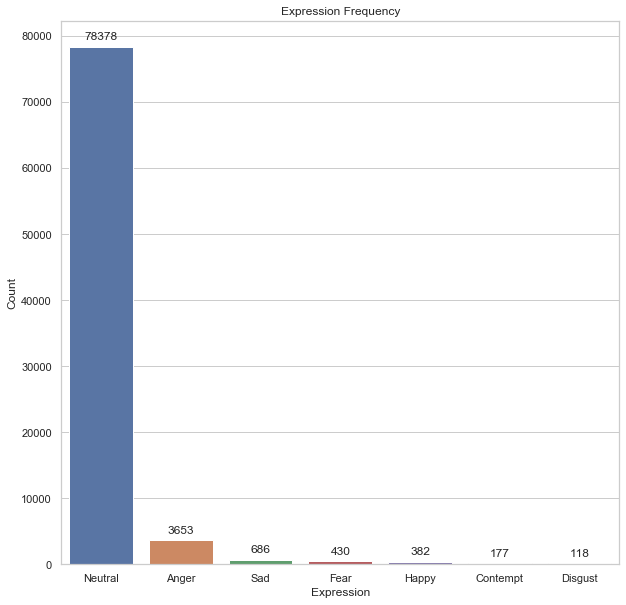

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.barplot(x=0, y=1,data=expressionFreqdf,)
ax.set(xlabel='Expression', ylabel='Count', title='Expression Frequency')
#ax.set(ylim=(-1, 1))
add_value_labels_int(ax)

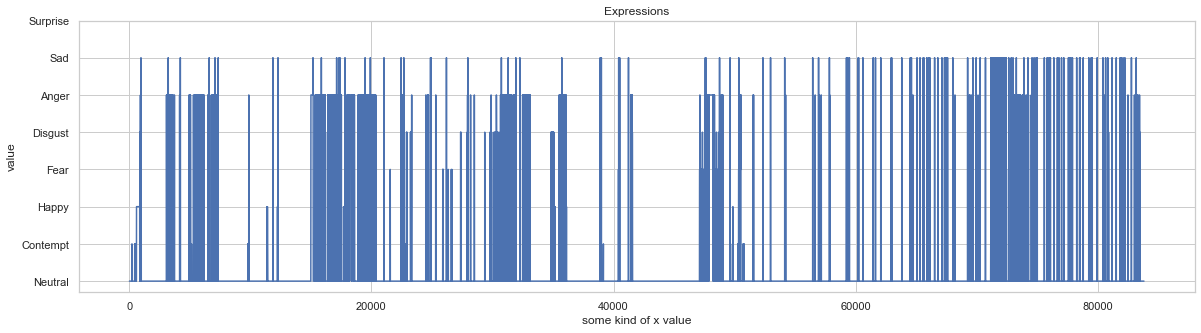

In [18]:
fig, ax = plt.subplots(figsize=(20, 5))

ax = sns.lineplot(data=expressionLabeled)

ax.set(xlabel='some kind of x value', ylabel='value', title='Expressions')
plt.yticks(expressionCategories)
plt.gca().invert_yaxis()
#ax.set(ylim=())